In [1]:
from utils import *
from fastai2.vision.widgets import *

In [2]:
scene_types = 'forest, buildings, glacier, mountain, forest, sea, street'

In [3]:
path = Path('scenes/seg_train')
fns = get_image_files(path)
fns

(#14034) [Path('scenes/seg_train/seg_train/mountain/3341.jpg'),Path('scenes/seg_train/seg_train/mountain/2005.jpg'),Path('scenes/seg_train/seg_train/mountain/13563.jpg'),Path('scenes/seg_train/seg_train/mountain/18132.jpg'),Path('scenes/seg_train/seg_train/mountain/15872.jpg'),Path('scenes/seg_train/seg_train/mountain/15826.jpg'),Path('scenes/seg_train/seg_train/mountain/11355.jpg'),Path('scenes/seg_train/seg_train/mountain/10453.jpg'),Path('scenes/seg_train/seg_train/mountain/19024.jpg'),Path('scenes/seg_train/seg_train/mountain/13203.jpg')...]

In [4]:
scenes = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=None,
    get_y=parent_label)

In [5]:
dls = scenes.dataloaders(path)

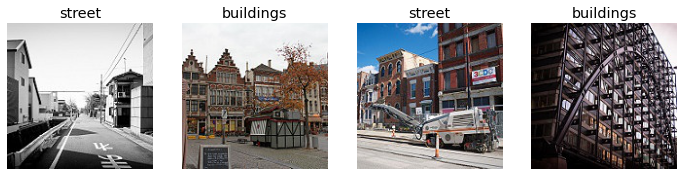

In [6]:
dls.valid.show_batch(max_n=4, nrows=1)

In [7]:
scenes = scenes.new(
    item_tfms=Resize(150))
dls = scenes.dataloaders(path, valid="scenes/seg_test")

In [12]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(4)

epoch,train_loss,valid_loss,error_rate,time
0,0.582160,0.373384,0.113685,00:19


epoch,train_loss,valid_loss,error_rate,time
0,0.311256,0.283794,0.088738,00:28
1,0.181693,0.297022,0.089095,00:28
2,0.077766,0.255464,0.070919,00:28
3,0.025463,0.262922,0.063792,00:28


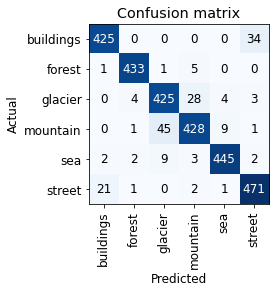

In [13]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

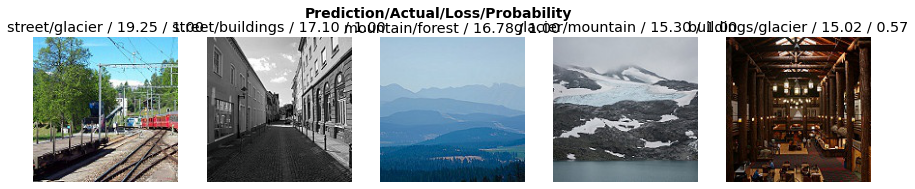

In [10]:
interp.plot_top_losses(5, nrows=1)

In [11]:
cleaner = ImageClassifierCleaner(learn)
cleaner

In [17]:
learn.export()

In [18]:
path = Path()
path.ls(file_exts='.pkl')

(#1) [Path('export.pkl')]

In [19]:
learn_inf = load_learner(path/'export.pkl')

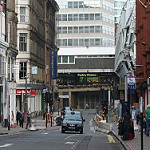

In [36]:
test_img_path = Path('scenes/seg_pred/seg_pred/10012.jpg')
im = Image.open(test_img_path)
im.to_thumb(150)

In [35]:
learn_inf.predict(test_img_path)

('street',
 tensor(5),
 tensor([2.7959e-03, 1.3288e-06, 4.0444e-07, 1.0267e-07, 4.5558e-08, 9.9720e-01]))

In [21]:
learn_inf.dls.vocab

(#6) ['buildings','forest','glacier','mountain','sea','street']

### Creating a Notebook app from the model

In [56]:
btn_upload = widgets.FileUpload()
btn_upload

FileUpload(value={}, description='Upload')

In [57]:
img = PILImage.create(btn_upload.data[-1])

In [58]:
out_pl = widgets.Output()
out_pl.clear_output()
with out_pl: display(img.to_thumb(150,150))
out_pl

Output()

In [59]:
pred,pred_idx,probs = learn_inf.predict(img)

In [60]:
lbl_pred = widgets.Label()
lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'
lbl_pred

Label(value='Prediction: sea; Probability: 0.9991')

In [46]:
btn_run = widgets.Button(description='Classify')
btn_run

Button(description='Classify', style=ButtonStyle())

In [61]:
def on_click_classify(change):
    img = PILImage.create(btn_upload.data[-1])
    out_pl.clear_output()
    with out_pl: display(img.to_thumb(150,150))
    pred,pred_idx,probs = learn_inf.predict(img)
    lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'

btn_run.on_click(on_click_classify)

In [62]:
#hide
#Putting back btn_upload to a widget for next cell
btn_upload = widgets.FileUpload()

In [64]:
VBox([widgets.Label('Upload an image of: the sea, mountains, buildings, sreets, glaciers, or the forest.'), 
      btn_upload, btn_run, out_pl, lbl_pred])